In [1]:
from persona2vec.model import Persona2Vec
from persona2vec.utils import read_graph
import numpy as np

In [2]:
G = read_graph('graph/karate.elist')

In [3]:
model = Persona2Vec(G, 0.1)

2019-08-29 04:49:19,000 Creating egonets.
100%|██████████| 34/34 [00:00<00:00, 5878.25it/s]
2019-08-29 04:49:19,012 Creating the persona network.
100%|██████████| 77/77 [00:00<00:00, 152125.02it/s]


In [4]:
model.simulate_walks()
emb = model.learn_embedding()

2019-08-29 04:49:19,113 Gerating Walk iteration:
100%|██████████| 10/10 [00:00<00:00, 33.35it/s]
2019-08-29 04:49:19,417 collecting all words and their counts
2019-08-29 04:49:19,418 PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-29 04:49:19,424 collected 56 word types from a corpus of 44800 raw words and 560 sentences
2019-08-29 04:49:19,424 Loading a fresh vocabulary
2019-08-29 04:49:19,425 effective_min_count=0 retains 56 unique words (100% of original 56, drops 0)
2019-08-29 04:49:19,426 effective_min_count=0 leaves 44800 word corpus (100% of original 44800, drops 0)
2019-08-29 04:49:19,427 deleting the raw counts dictionary of 56 items
2019-08-29 04:49:19,429 sample=0.001 downsamples 56 most-common words
2019-08-29 04:49:19,429 downsampling leaves estimated 12507 word corpus (27.9% of prior 44800)
2019-08-29 04:49:19,430 estimated required memory for 56 words and 128 dimensions: 85344 bytes
2019-08-29 04:49:19,431 resetting layer weights
2019-08-29 04:49

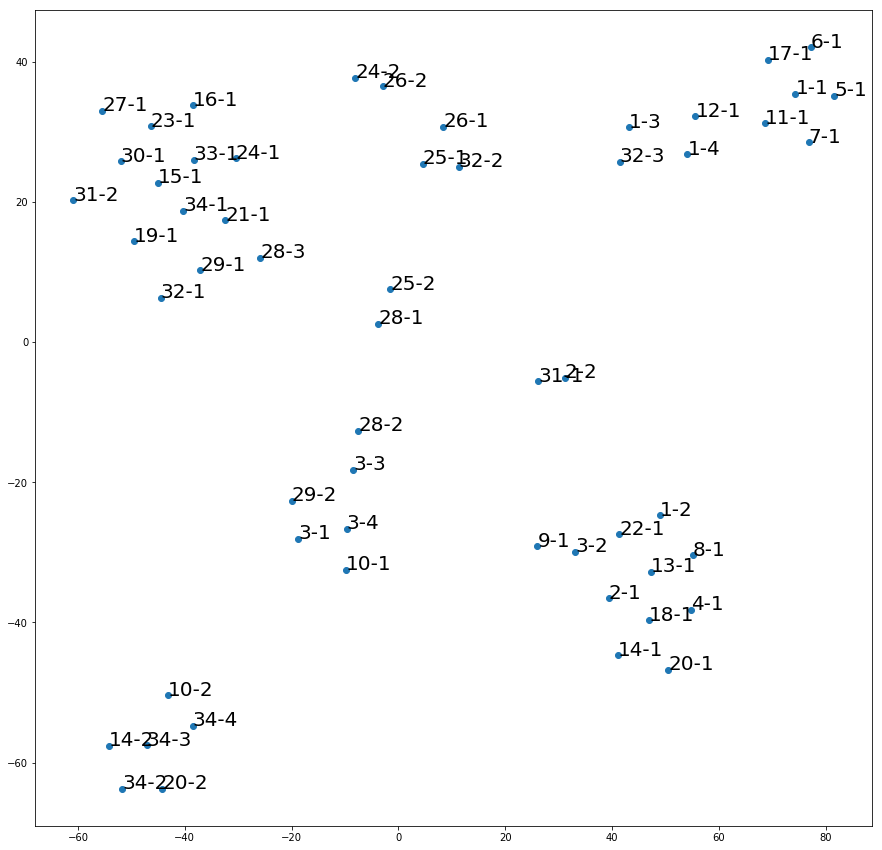

In [6]:
base_embedding_list =  np.vstack([v for k,v in emb.items()])
persona_list = list(emb.keys())
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
Y = TSNE(n_components=2, learning_rate=100, perplexity=10).fit_transform(base_embedding_list)
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(Y[:,0], Y[:,1])
for i, name in enumerate(persona_list):
    plt.annotate(name, xy=Y[i], fontsize=20)
plt.show()